# Assignment 1

First we need to import a few modules, execute the cell below:

In [1]:
import numpy 

import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [2]:
def f(x):
    y = numpy.cos(x)
    return y

You can use the following cell to check that your code works for scalar arguments:

In [3]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [4]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [5]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    y = -1*numpy.sin(x)
    return y;

In [6]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [7]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [8]:
def backward_difference(f, x, dx):
    y = (f(x)-f(x-dx))/dx 
    return y


  
    

In [9]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


Text(0,0.5,'Backward Difference - Analytical derivative')

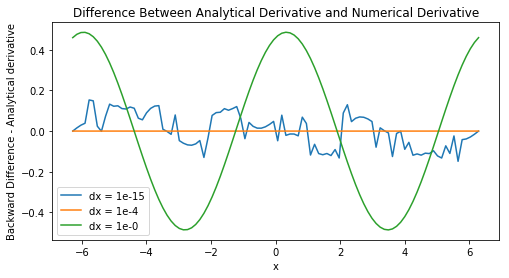

In [20]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)


df_dx_1 = backward_difference(f, xs, dx=1e-15)
df_dx_2 = backward_difference(f, xs, dx=1e-4)
df_dx_3= backward_difference(f, xs, dx=1e0)


df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8,4))
           
plt.plot(xs, df_dx_1 - df_dx_analytical, label = 'dx = 1e-15' )
plt.plot(xs, df_dx_2 - df_dx_analytical, label = 'dx = 1e-4')
plt.plot(xs, df_dx_3 - df_dx_analytical, label = 'dx = 1e-0')

           
plt.title("Difference Between Analytical Derivative and Numerical Derivative")
plt.legend()
plt.xlabel('x') 
plt.ylabel('Backward Difference - Analytical derivative')


**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)




For large values of dx: 
The error on the backward difference is aproximately = (1/2)dx*f''(x); by comparing the taylor expation of the function around a point. 
The plot of the difference between the analytical derivative has a sinusodal shape as the second derivative of cos(x) = - cos(x). (Represented by the Green line)


For Small Values of dx: 
Computers only store numbers to a certain number of significant figures for each float. This means that when functions use very small values and do operations that return a lower number of significant figures, the computer must add random values for these missing significant figures. When this output is used it has variations compared witht the true value of the function. ( this is what can be seen by the blue line)